In [1]:
'''
Dataset과 dataloader
데이터 샘플을 처리하는 코드는 지저분하고 유지보수가 어려울 수 있습니다. 더 나은 가독성과 모듈성을 위해 데이터셋 코드를 모델 학습코드로부터
분리하는 것이 이상적입니다. pytorch는 torch.utils.data.DataLoader와 torch.utils.data.Dataset의 두 가지 데이터 기본요소를 제공하여 미리 준비된 데이터셋 뿐만
아니라가지고 있는 데이터를 사용할 수 있도록 합니다. Dataset은 샘플과 정답을 저장하고 , DataLoader는 Dataset을 샘플에 쉽게 접근할 수 있도록 
순회 가능한 객체로 감쌉니다.
'''
'''
Pytorch은 도메인 특화 라이브러리들은(FashonMnist와 같은)다양하 미리 준비해둔 데이터셋을 제공합니다. 데이터셋은torch.utils.data.Dataset의 하위 클래스로 
개별 데이터를 특정하는 함수가 구현되어 있습니다. 이러한 데이터셋은 모델을 만들어보고(prototype)성능을 측정하는데 사용할 수 있습니다.
'''

'\nPytorch은 도메인 특화 라이브러리들은(FashonMnist와 같은)다양하 미리 준비해둔 데이터셋을 제공합니다. 데이터셋은torch.utils.data.Dataset의 하위 클래스로 \n개별 데이터를 특정하는 함수가 구현되어 있습니다. 이러한 데이터셋은 모델을 만들어보고(prototype)성능을 측정하는데 사용할 수 있습니다.\n'

In [2]:
'''
Dataset 불러오기
'''
'''
TorchVision에서 Fasion-MINIST데이터셋을 불러오는 예제를 살펴보겠습니다. Fashion-MINIST는 Zalando의 기사 이미지 데이터셋으로 60,000개의 학습예제와 10000개의 
테스트 예제로 이루어져 있습니다.
각 예제는 흑백의 28*28이미지와 10개 분류중 하니인 정답으로 구성됩니다.
   -> root는 학습/테스트 데이터가 저장되는 경로입니다
   -> train은 학습용 또는 테스트용 데이터셋 여부를 지정합니다.
   -> download=True는 root에 데이터가 없는 경우 인터넷에서 다운로드합니다.
   -> transform과 target_transform은 특징(feature)과 정답(label)변형(transform)을 지정합니다.
'''

'\nTorchVision에서 Fasion-MINIST데이터셋을 불러오는 예제를 살펴보겠습니다. Fashion-MINIST는 Zalando의 기사 이미지 데이터셋으로 60,000개의 학습예제와 10000개의 \n테스트 예제로 이루어져 있습니다.\n각 예제는 흑백의 28*28이미지와 10개 분류중 하니인 정답으로 구성됩니다.\n   -> root는 학습/테스트 데이터가 저장되는 경로입니다\n   -> train은 학습용 또는 테스트용 데이터셋 여부를 지정합니다.\n   -> download=True는 root에 데이터가 없는 경우 인터넷에서 다운로드합니다.\n   -> transform과 target_transform은 특징(feature)과 정답(label)변형(transform)을 지정합니다.\n'

In [11]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [12]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

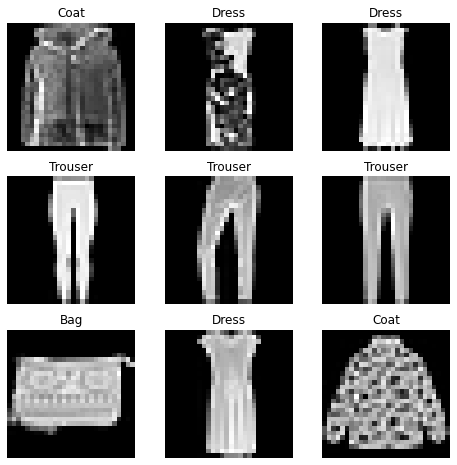

In [43]:
'''
데이터셋을 순회하고 사각화하기
'''
# dataset에 list처럼 직접접근할 수 있습니다. training_data[index].matplotlib을 사용하여 학습 데이터의 일부를 시각화해보겠습니다.
label_map={
    0:"T-shirt",
    1:"Trouser",
    2:"Pullover",
    3:"Dress",
    4:"Coat",
    5:"Sandal",
    6:"Shirt",
    7:"Sneaker",
    8:"Bag",
    9:"Ankle Boot"
}
figure=plt.figure(figsize=(8,8))
cols,rows=3,3
for i  in range(1,cols*rows+1):
    sample_idx = torch.randint(len(training_data),size=(1,)).item()
            #이건 그냥 랜덤으로 그림을 가져올려는 코드 training_data의 최대갯수=len(training_data) tensor의 사이즈는=size=(1,)
            #https://pytorch.org/docs/stable/generated/torch.randint.html 
    img, label = training_data[sample_idx]
    figure.add_subplot(rows,cols,i)
    plt.title(label_map[label])
    plt.axis("off") #on을 하면 각 subplot에 좌표?가 생긴다.
    plt.imshow(img.squeeze(),cmap="gray") #squeeze() 함수는 원소가 1인 차원을 제거

In [46]:
'''
파일에서 사용자 정의 데이터셋 만들기
'''
'''
사용자 정의 dataset 크랠스는 반드시 3개의 함수를 구현해야 합니다.--> __init__,__len__,and__getitem__.
아래 구현을 살펴보면 FashionMNIST이미지들은 img_dir디렉토리에 저장되고 ,정답은 annotations_file csv파일에 별로도 저장됩니다.
'''

'\n사용자 정의 데이터셋 만들기\n사용자 정의 dat\n'

In [48]:
import os
import pandas as pd
from torchvision.io import read_image

In [52]:
class CustomImageDataset(Dataset):
    # __init__ 함수는 dataset 객체가 생성될 때 한번만 생행됩니다. 여기서는 이미자와 주석 파일이 포함된 디렉토리와 두가지 변형을 초기화합니다.
    def __init__ (self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file, names=["file_name","label"])
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
    
    # __len__함수는 데이터셋의 샘플개수를 반환합니다.
    def __len__(self):
        return len(self.img_labels)
    
    # __getitem__함수는 주어진 인덱스 idx에 해당하는 샘플을데이터셋에서 불러오고 반환합니다. 인덱스를 기반으로 ,디스크에서 이미지의 위치를 식별하고, read_image를
    # 사용하여 이미지를 텐서로 변환하고, self.img_labels의 csv데이터로부터 해당하는 정답(label)을 가져오고, (해당하는 경우)변형(transform)함수들을 호출한 뒤, 
    # 텐서이미지와 라벨을 python의 dict형으로 반환한다.
    def __getitem__(self,idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx,0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx,1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        sample = {"image":image,"label":label}
        return sample

In [53]:
'''
DataLoader로 학습용 데이터 준비하기

dataset은 데이터셋의 특징(feature)을 가져오고 하나의 샘플에 정답(label)을 지정하는 일을 한 번에 합니다. 모델을 학습할 때, 일밙거으로 샘플들을 "미니배치(minibatch)"
로 전달하고, 매 에폭(epoch)마다 데이터를 다시 섞어서 과적합(overfit)을 막고, python의 multiprocessing을 사용하여 데이터 검색 속도를 높이려고 합니다.

dataloader는 간단한 api로 이러한 복잡한 과정들을 추상화한 반복(순회) 가능한 객체입니다.
'''

'\nDataLoader로 학습용 데이터 준비하기\n\ndataset은 데이터셋의 특징(feature)을 가져오고 하나의 샘플에 정답(label)을 지정하는 일을 한 번에 합니다. 모델을 학습할 때, 일밙거으로 샘플들을 "미니배치(minibatch)"\n로 전달하고, 매 에폭(epoch)마다 데이터를 다시 섞어서 과적합(overfit)을 막고, python의 multiprocessing을 사용하여 데이터 검색 속도를 높이려고 합니다.\n\ndataloader는 간단한 api로 이러한 복잡한 과정들을 추상화한 순회 가능한 객체입니다.\n'

In [54]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [55]:
'''
DataLoader를 통해 반복(순회)하기(iterate)

DataLoader에 데이터셋을 불러온 뒤에는 필요에 따라 데이터셋을 반복할 수 있습니다. 아래의 각 반복은 (각각 batch_size=64의 특징과 정답을 포함하는)train_features와
train_labels의 묶음(batch)을 반환합니다. suffle = True로 지정했으므로, 모든 배치를 순회한 뒤 데이터가 섞입니다.(dataload 순서를 보다 세밀하게 제어하려면 samplers를 
살펴보자)
'''

'\nDataLoadr를 통해 반복(순회)하기(iterate)\n'

Feature batch shape:torch.Size([64, 1, 28, 28])
Labels batch shape:torch.Size([64])


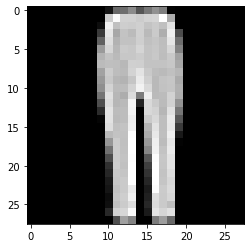

Label:1


In [63]:
train_features, train_labels = next(iter(train_dataloader)) # https://dojang.io/mod/page/view.php?id=2408
print(f"Feature batch shape:{train_features.size()}")
print(f"Labels batch shape:{train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img,cmap="gray")
plt.show()
print(f"Label:{label}")